In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import eia

# Set plotting style
sns.set(style='whitegrid')

In [2]:
# Load the data from the text file
data = pd.read_csv('data/raw/PET/PET.txt', sep='\t', header=None, names=['json_str'])

# Function to parse JSON strings
def parse_json_str(json_str):
    return json.loads(json_str)

# Apply the function to parse the JSON strings
parsed_data = data['json_str'].apply(parse_json_str)

# Create a DataFrame from the parsed JSON data
df = pd.json_normalize(parsed_data)

# Display the first few rows of the DataFrame
print(df.head())

                       series_id  \
0  PET.EMM_EPMPR_PTE_Y35NY_DPG.W   
1  PET.EMM_EPMPR_PTE_Y44HO_DPG.W   
2  PET.EMM_EPMMR_PTE_R5XCA_DPG.W   
3  PET.EMM_EPMMR_PTE_Y05LA_DPG.W   
4  PET.EMM_EPMMR_PTE_Y05SF_DPG.W   

                                                name               units  f  \
0  New York Harbor Premium Reformulated Retail Ga...  Dollars per Gallon  W   
1  Houston, TX Premium Reformulated Retail Gasoli...  Dollars per Gallon  W   
2  West Coast (PADD 5) Except California Midgrade...  Dollars per Gallon  W   
3  Los Angeles, CA Midgrade Reformulated Retail G...  Dollars per Gallon  W   
4  San Francisco, CA Midgrade Reformulated Retail...  Dollars per Gallon  W   

  unitsshort                                        description copyright  \
0      $/gal  New York Harbor Premium Reformulated Retail Ga...      None   
1      $/gal  Houston, TX Premium Reformulated Retail Gasoli...      None   
2      $/gal  West Coast (PADD 5) Except California Midgrade...      None   


In [3]:
df.columns

Index(['series_id', 'name', 'units', 'f', 'unitsshort', 'description',
       'copyright', 'source', 'iso3166', 'geography', 'start', 'end',
       'last_updated', 'data', 'geography2', 'category_id',
       'parent_category_id', 'notes', 'childseries'],
      dtype='object')

In [4]:
# Sample this list to see ten random elements
df_list = df['data'].tolist()
print(df_list[:2])

[[['20240617', 4.306], ['20240610', 4.328], ['20240603', 4.367], ['20240527', 4.412], ['20240520', 4.399], ['20240513', 4.434], ['20240506', 4.457], ['20240429', 4.469], ['20240422', 4.472], ['20240415', 4.224], ['20240408', 4.177], ['20240401', 4.152], ['20240325', 4.185], ['20240318', 4.108], ['20240311', 4.098], ['20240304', 4.101], ['20240226', 4.067], ['20240219', 4.085], ['20240212', 4.032], ['20240205', 4.031], ['20240129', 4.041], ['20240122', 3.988], ['20240115', 3.986], ['20240108', 4.038], ['20240101', 4.053], ['20231225', 4.074], ['20231218', 4.059], ['20231211', 4.127], ['20231204', 4.2], ['20231127', 4.231], ['20231120', 4.226], ['20231113', 4.236], ['20231106', 4.295], ['20231030', 4.346], ['20231023', 4.384], ['20231016', 4.444], ['20231009', 4.473], ['20231002', 4.529], ['20230925', 4.568], ['20230918', 4.632], ['20230911', 4.561], ['20230904', 4.544], ['20230828', 4.571], ['20230821', 4.58], ['20230814', 4.576], ['20230807', 4.576], ['20230731', 4.538], ['20230724', 4

In [5]:
# Explode the 'data' column to separate rows for each date-value pair
df = df.explode('data')
df.head()

,series_id,name,units,f,unitsshort,description,copyright,source,iso3166,geography,start,end,last_updated,data,geography2,category_id,parent_category_id,notes,childseries
0,PET.EMM_EPMPR_PTE_Y35NY_DPG.W,New York Harbor Premium Reformulated Retail Ga...,Dollars per Gallon,W,$/gal,New York Harbor Premium Reformulated Retail Ga...,None,"EIA, U.S. Energy Information Administration",USA-NY,USA-NY,20000605,20240617,2024-06-17T22:10:18-04:00,"[20240617, 4.306]",NaN,NaN,NaN,NaN,NaN
0,PET.EMM_EPMPR_PTE_Y35NY_DPG.W,New York Harbor Premium Reformulated Retail Ga...,Dollars per Gallon,W,$/gal,New York Harbor Premium Reformulated Retail Ga...,None,"EIA, U.S. Energy Information Administration",USA-NY,USA-NY,20000605,20240617,2024-06-17T22:10:18-04:00,"[20240610, 4.328]",NaN,NaN,NaN,NaN,NaN
0,PET.EMM_EPMPR_PTE_Y35NY_DPG.W,New York Harbor Premium Reformulated Retail Ga...,Dollars per Gallon,W,$/gal,New York Harbor Premium Reformulated Retail Ga...,None,"EIA, U.S. Energy Information Administration",USA-NY,USA-NY,20000605,20240617,2024-06-17T22:10:18-04:00,"[20240603, 4.367]",NaN,NaN,NaN,NaN,NaN
0,PET.EMM_EPMPR_PTE_Y35NY_DPG.W,New York Harbor Premium Reformulated Retail Ga...,Dollars per Gallon,W,$/gal,New York Harbor Premium Reformulated Retail Ga...,None,"EIA, U.S. Energy Information Administration",USA-NY,USA-NY,20000605,20240617,2024-06-17T22:10:18-04:00,"[20240527, 4.412]",NaN,NaN,NaN,NaN,NaN
0,PET.EMM_EPMPR_PTE_Y35NY_DPG.W,New York Harbor Premium Reformulated Retail Ga...,Dollars per Gallon,W,$/gal,New York Harbor Premium Reformulated Retail Ga...,None,"EIA, U.S. Energy Information Administration",USA-NY,USA-NY,20000605,20240617,2024-06-17T22:10:18-04:00,"[20240520, 4.399]",NaN,NaN,NaN,NaN,NaN


In [6]:
# Select distinct series_id, name, units
df_series = df[['series_id', 'name', 'units']].drop_duplicates()
df_series.head()

,series_id,name,units
0,PET.EMM_EPMPR_PTE_Y35NY_DPG.W,New York Harbor Premium Reformulated Retail Ga...,Dollars per Gallon
1,PET.EMM_EPMPR_PTE_Y44HO_DPG.W,"Houston, TX Premium Reformulated Retail Gasoli...",Dollars per Gallon
2,PET.EMM_EPMMR_PTE_R5XCA_DPG.W,West Coast (PADD 5) Except California Midgrade...,Dollars per Gallon
3,PET.EMM_EPMMR_PTE_Y05LA_DPG.W,"Los Angeles, CA Midgrade Reformulated Retail G...",Dollars per Gallon
4,PET.EMM_EPMMR_PTE_Y05SF_DPG.W,"San Francisco, CA Midgrade Reformulated Retail...",Dollars per Gallon


In [7]:
# Filter df to only include name containing 'Louisiana' and units in Dollars per Gallon
df = df[df['name'].str.contains('Louisiana') & df['units'].str.contains('Dollars per Gallon')]
df

,series_id,name,units,f,unitsshort,description,copyright,source,iso3166,geography,start,end,last_updated,data,geography2,category_id,parent_category_id,notes,childseries
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202203, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202202, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202201, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202112, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202111, None]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,"[199405, None]",NaN,NaN,NaN,NaN,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,"[199404, None]",NaN,NaN,NaN,NaN,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,"[199403, None]",NaN,NaN,NaN,NaN,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,"[199402, None]",NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows where 'data' is NaN or not a list
df = df.dropna(subset=['data'])
df = df[df['data'].apply(lambda x: isinstance(x, list) and len(x) == 2)]
df.head()

,series_id,name,units,f,unitsshort,description,copyright,source,iso3166,geography,start,end,last_updated,data,geography2,category_id,parent_category_id,notes,childseries
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202203, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202202, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202201, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202112, None]",NaN,NaN,NaN,NaN,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,"[202111, None]",NaN,NaN,NaN,NaN,NaN


In [9]:
# Split 'data' column into 'date' and 'value'
df[['date', 'value']] = pd.DataFrame(df['data'].tolist(), index=df.index)

In [10]:
df

,series_id,name,units,f,unitsshort,description,copyright,source,iso3166,geography,...,end,last_updated,data,geography2,category_id,parent_category_id,notes,childseries,date,value
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202203, None]",NaN,NaN,NaN,NaN,NaN,202203,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202202, None]",NaN,NaN,NaN,NaN,NaN,202202,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202201, None]",NaN,NaN,NaN,NaN,NaN,202201,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202112, None]",NaN,NaN,NaN,NaN,NaN,202112,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202111, None]",NaN,NaN,NaN,NaN,NaN,202111,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199405, None]",NaN,NaN,NaN,NaN,NaN,199405,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199404, None]",NaN,NaN,NaN,NaN,NaN,199404,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199403, None]",NaN,NaN,NaN,NaN,NaN,199403,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199402, None]",NaN,NaN,NaN,NaN,NaN,199402,NaN


In [11]:
# Convert 'date' and 'value' to the correct types
# Convert 'date' to datetime, coercing errors to NaT
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')
# Convert 'value' to a numeric type, coercing errors to NaN
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df

,series_id,name,units,f,unitsshort,description,copyright,source,iso3166,geography,...,end,last_updated,data,geography2,category_id,parent_category_id,notes,childseries,date,value
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202203, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202202, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202201, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202112, None]",NaN,NaN,NaN,NaN,NaN,2021-01-02,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,202203,2022-06-01T10:50:11-04:00,"[202111, None]",NaN,NaN,NaN,NaN,NaN,2021-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199405, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199404, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199403, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,...,200612,2013-08-13T11:49:51-04:00,"[199402, None]",NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [12]:
# Drop the original 'data' column if no longer needed
df.drop(columns=['data'], inplace=True)
df

,series_id,name,units,f,unitsshort,description,copyright,source,iso3166,geography,start,end,last_updated,geography2,category_id,parent_category_id,notes,childseries,date,value
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,NaN,NaN,NaN,NaN,NaN,2021-01-02,NaN
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...,Dollars per Gallon,M,$/gal,Louisiana Reformulated Gasoline Premium Bulk S...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,202203,2022-06-01T10:50:11-04:00,NaN,NaN,NaN,NaN,NaN,2021-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN
177271,PET.EMA_EPM0X_PBS_SLA_DPG.M,Louisiana Oxygenated Gasoline Bulk Sales Price...,Dollars per Gallon,M,$/gal,Louisiana Oxygenated Gasoline Bulk Sales Price...,None,"EIA, U.S. Energy Information Administration",USA-LA,USA-LA,199401,200612,2013-08-13T11:49:51-04:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [13]:
# Get distinct series_id, name pairs
series_names = df[['series_id', 'name']].drop_duplicates()
series_names

,series_id,name
91197,PET.EMA_EPMPR_PBS_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Bulk S...
91248,PET.EMA_EPMPU_PDS_SLA_DPG.M,Louisiana Conventional Gasoline Premium DTW Sa...
91283,PET.EMA_EPMPR_PTA_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Retail...
91336,PET.EMA_EPMPU_PTC_SLA_DPG.M,Louisiana Conventional Gasoline Premium Throug...
91581,PET.EMA_EPMPR_PRA_SLA_DPG.M,Louisiana Reformulated Gasoline Premium Rack S...
...,...,...
177004,PET.EMA_EPM0X_PDS_SLA_DPG.M,Louisiana Oxygenated Gasoline DTW Sales Price ...
177017,PET.EMA_EPMRX_PTC_SLA_DPG.M,Louisiana Oxygenated Gasoline Regular Through ...
177215,PET.EMA_EPMMX_PTC_SLA_DPG.M,Louisiana Oxygenated Gasoline Midgrade Through...
177223,PET.EMA_EPMMX_PTA_SLA_DPG.M,Louisiana Oxygenated Gasoline Midgrade Retail ...


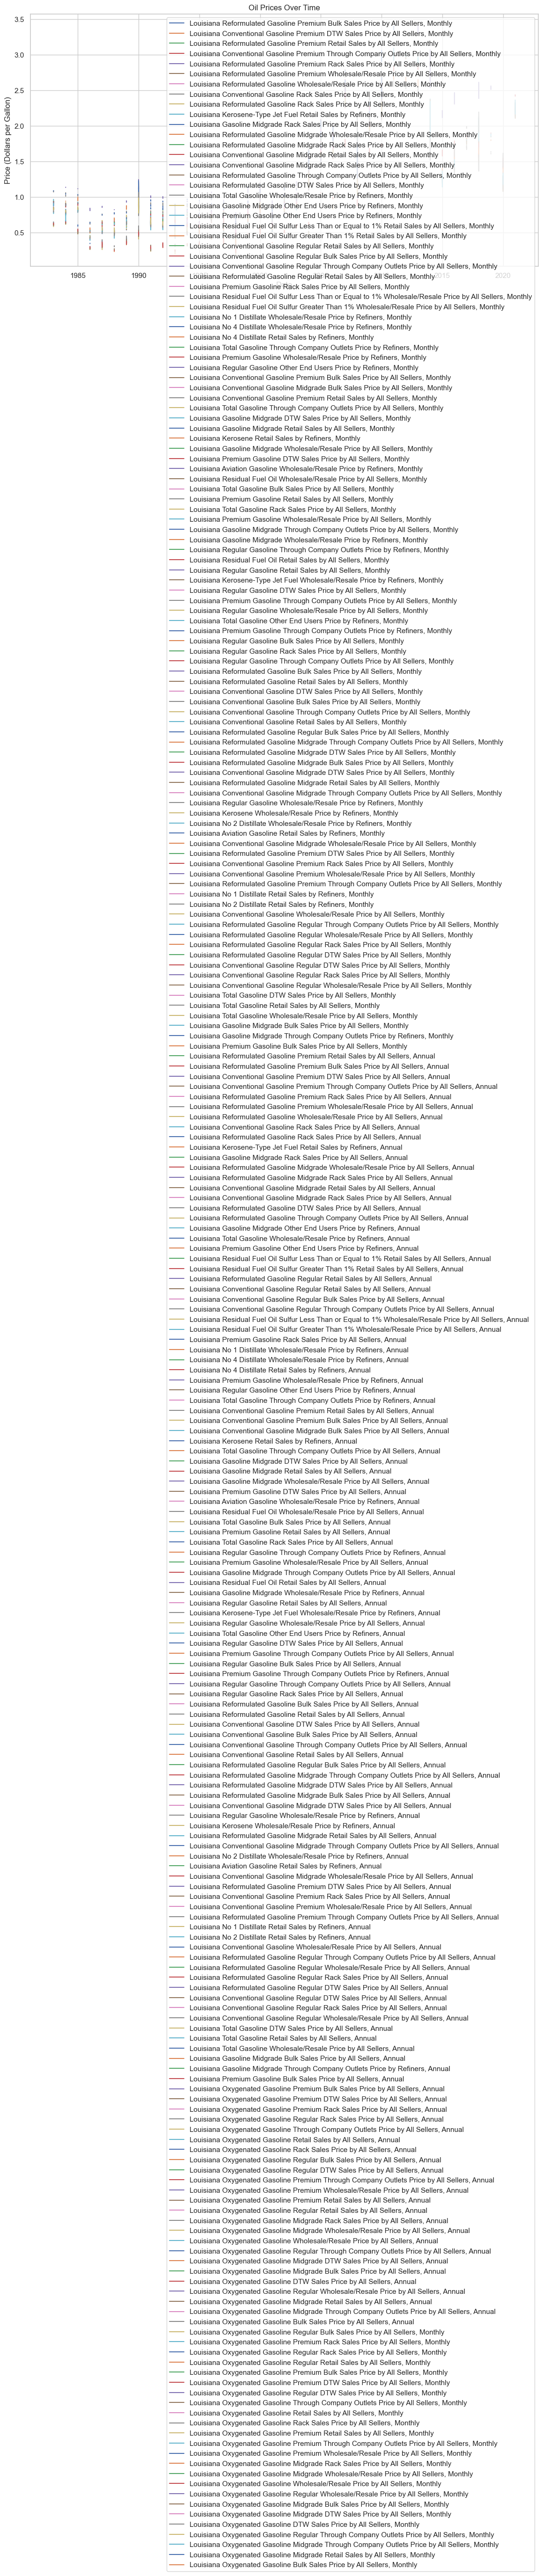

                                date         value
count                           7130  20100.000000
mean   2004-09-19 10:35:34.754558336      1.168855
min              1983-01-01 00:00:00      0.186000
25%              1997-01-02 00:00:00      0.645000
50%              2004-01-02 00:00:00      0.881500
75%              2013-01-01 00:00:00      1.601000
max              2021-01-02 00:00:00      4.190000
std                              NaN      0.730876


In [14]:
# Plot time series data for different series
plt.figure(figsize=(14, 7))
for series in df['series_id'].unique():
    subset = df[df['series_id'] == series]
    plt.plot(subset['date'], subset['value'], label=subset['name'].iloc[0])

plt.xlabel('Date')
plt.ylabel('Price (Dollars per Gallon)')
plt.title('Oil Prices Over Time')
plt.legend()
plt.show()

# Summary statistics
print(df.describe())

In [15]:
# Filter the dataset for a specific series_id for forecasting
series_id = 'PET.EMM_EPMPR_PTE_Y35NY_DPG.W'  # Example series_id
df_series = df[df['series_id'] == series_id][['date', 'value']].rename(columns={'date': 'ds', 'value': 'y'})

# Display the first few rows of the filtered DataFrame
print(df_series.head())

Empty DataFrame
Columns: [ds, y]
Index: []


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_series is a DataFrame with two columns: 'ds' for dates and 'y' for values
# Convert 'ds' from datetime to ordinal
df_series['ds_ordinal'] = df_series['ds'].apply(lambda x: x.toordinal())

# Split data into features and target
X = df_series[['ds_ordinal']]
y = df_series['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# To forecast future dates, create a DataFrame for future dates and convert to ordinal
future_dates = pd.date_range(start=df_series['ds'].max(), periods=365, freq='D')
future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)

# Forecast future values
future_forecast = model.predict(future_dates_ordinal)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.scatter(df_series['ds'], y, color='black', label='Actual')
plt.plot(future_dates, future_forecast, color='blue', label='Forecast')
plt.title('Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Gallon)')
plt.legend()
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [17]:
# Convert 'ds' to ordinal
df_series['ds_ordinal'] = df_series['ds'].apply(lambda x: x.toordinal())

# Split data into training and testing sets
train = df_series[df_series['ds'] < '2023-01-01']
test = df_series[df_series['ds'] >= '2023-01-01']

# Prepare the features and target variables
X_train = train[['ds_ordinal']]
y_train = train['y']
X_test = test[['ds_ordinal']]
y_test = test['y']

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test['ds'], y_test, label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Gallon)')
plt.title('Actual vs Predicted Oil Prices')
plt.legend()
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
# # Save the model
# import joblib
# joblib.dump(model, 'models/oil_price_forecast_model.pkl')